In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline

pd.set_option('display.max_rows', None)

In [2]:
ref_df = pd.read_csv("../data/UNdata_refugees.csv", skipfooter=3, engine='python')
ref_df = ref_df[["Country or territory of asylum or residence", "Country or territory of origin", 
                      "Year", "Refugees<sup>*</sup>"]]
ref_df = ref_df.rename({"Country or territory of asylum or residence": "asylum", 
                        "Country or territory of origin": "origin", "Refugees<sup>*</sup>": "refugees"}, axis="columns")
ref_df["Year"] = ref_df["Year"].astype(int)
ref_df = ref_df.dropna() # There are 198 rows with refugees as NA
ref_df["refugees"] = ref_df["refugees"].astype(int)

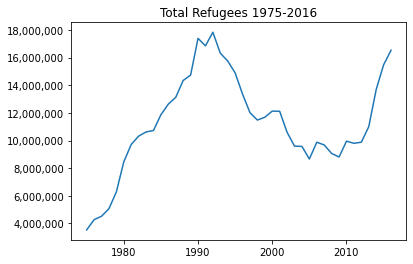

In [15]:
plt.plot(ref_df.groupby("Year").sum())
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Total Refugees 1975-2016")
print()

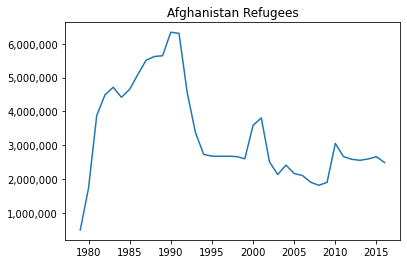

In [14]:
plt.plot(ref_df[ref_df["origin"] == "Afghanistan"].groupby("Year").sum()["refugees"])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Afghanistan Refugees")
print()

In [20]:
len(set(ref_df[ref_df["Year"] == 1975]["asylum"]))

50

In [21]:
len(set(ref_df[ref_df["Year"] == 1975]["origin"]))

39

In [23]:
for x in range(1975,2017):
    print(len(set(ref_df[ref_df["Year"] == x]["asylum"])), len(set(ref_df[ref_df["Year"] == x]["origin"])))

50 39
53 34
72 33
82 45
88 42
90 64
92 65
94 69
97 70
96 72
99 75
97 75
98 75
98 92
101 99
112 111
118 122
132 134
139 144
142 172
143 178
143 184
147 186
146 186
151 189
150 189
151 182
147 191
147 191
148 191
149 190
153 195
155 196
156 195
161 193
163 196
169 199
167 200
169 203
170 205
172 203
173 204


In [48]:
tmp_df = ref_df[ref_df["Year"] == 2016][["origin", "refugees"]].groupby("origin").sum()\
    .sort_values( "refugees", ascending = False)
tmp_df[tmp_df["refugees"] > 100]

,refugees
origin,
Syrian Arab Rep.,5500448
Afghanistan,2488689
South Sudan,1436651
Somalia,1012323
Sudan,646036
Dem. Rep. of the Congo,537265
Central African Rep.,490892
Eritrea,431704
Burundi,408085


In [42]:
tmp_df = ref_df[ref_df["Year"] == 1975][["origin", "refugees"]].groupby("origin").sum()\
    .sort_values( "refugees", ascending = False)
tmp_df[tmp_df["refugees"] > 100]

,refugees
origin,
Various,1920594
Angola,501830
Guinea,300000
Rwanda,175720
Burundi,141940
Ethiopia,91410
Equatorial Guinea,90000
Lao People's Dem. Rep.,55510
Guinea-Bissau,46000


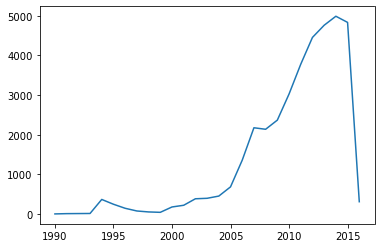

In [56]:
plt.plot(ref_df[ref_df["origin"] == "United States"].groupby("Year").sum())

In [55]:
ref_df[(ref_df["origin"] == "United States") & (ref_df["Year"] == 2015)]

,asylum,origin,Year,refugees
5537,Argentina,United States,2015,4
5673,Australia,United States,2015,15
5778,Austria,United States,2015,1
6072,Brazil,United States,2015,1
6346,Canada,United States,2015,4573
6891,Ecuador,United States,2015,6
7220,France,United States,2015,1
7427,Germany,United States,2015,159
7673,Hungary,United States,2015,2
8535,Mexico,United States,2015,1
